In [4]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


['pT_xjj0p9_newweight.png', 'PT_xbb0p95_reweighted.png', 'output_xbb0p7.png', 'outparquet', 'output_xbb0p95.png', '.DS_Store', '0-1.parquet', 'LICENSE', 'requirements.txt', 'ZJets.ipynb', 'mSD_xjj0p9_newweight.png', 'output_xjj0p7.png', 'Discriminators.ipynb', 'pyproject.toml', 'mSD_xbb0p9_reweighted.png', 'mSD_xbb0p95_reweighted.png', '.sites_map.json', 'output_xbb0p95_nokfactor.png', 'PT_xjj0p9_reweighted.png', 'mSD_xbb0p7_reweighted.png', 'README.md', 'output_xbb0p7_nokfactor.png', 'output_xbb0p95_kfactor.png', 'output_xjj0p7_nokfactor.png', '.gitignore', 'output_xjj0p95.png', 'output_xjj0p9.png', 'print_parquet.py', 'outfiles', 'mSD_xjj0p9_reweighted.png', 'PT_xbb0p7_reweighted.png', '.git', 'data', 'output_xjj0p95_nokfactor.png', 'PT_xbb0p9_reweighted.png', 'output_xbb0p9.png', 'mSDplot.ipynb', 'output_xbb0p9_nokfactor.png', 'src']


In [5]:

from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

In [6]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [60]:
vpt_axis = hist.axis.Regular(80, 0, 1000, name="pt", label="Z pT [GeV]")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)  #LO and NLO categories
sample_axis = hist.axis.StrCategory([], name="name", growth=True)  #samples
order_axis = hist.axis.StrCategory([], name="order", growth=True)  #order
ht_axis = hist.axis.Regular(80, 0, 1000, name="pt", label="HT [GeV]")

# My method without load samples

In [56]:
MAIN_DIR = "/Users/gbibim/Here/genZ/data"
#dir_name = "children" #"new"  # data for older samples new for the files with lhe variables
dir_name = "PNetchildren" 
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
year = "2023"  

# Define the samples and the directories where they are stored
samples = {
    "Zto2Q": {
        #"LO": [
        #    "Zto2Q-4Jets_HT-200to400",
        #    "Zto2Q-4Jets_HT-400to600",
        #    "Zto2Q-4Jets_HT-600to800",
        #    "Zto2Q-4Jets_HT-800",
        #],
        "NLO": [
            "Zto2Q-2Jets_PTQQ-100to200_1J",
            "Zto2Q-2Jets_PTQQ-100to200_2J",
            "Zto2Q-2Jets_PTQQ-200to400_1J",
            "Zto2Q-2Jets_PTQQ-200to400_2J",
            "Zto2Q-2Jets_PTQQ-400to600_1J",
            "Zto2Q-2Jets_PTQQ-400to600_2J",
            "Zto2Q-2Jets_PTQQ-600_1J",
            "Zto2Q-2Jets_PTQQ-600_2J",
        ],
    },
    #"Zto2Nu": {
    #    "LO": [
    #        "Zto2Nu-4Jets_HT-100to200",
    #        "Zto2Nu-4Jets_HT-200to400",
    #        "Zto2Nu-4Jets_HT-400to800",
    #        "Zto2Nu-4Jets_HT-800to1500",
    #    ],
    #    "NLO": [
    #        "Zto2Nu-2Jets_PTNuNu-100to200_1J",
    #        "Zto2Nu-2Jets_PTNuNu-100to200_2J",
    #        "Zto2Nu-2Jets_PTNuNu-200to400_1J",
    #        "Zto2Nu-2Jets_PTNuNu-200to400_2J",
    #        "Zto2Nu-2Jets_PTNuNu-400to600_1J",
    #        "Zto2Nu-2Jets_PTNuNu-400to600_2J",
    #        "Zto2Nu-2Jets_PTNuNu-600_1J",
    #        "Zto2Nu-2Jets_PTNuNu-600_2J",
    #    ],
    #},
    "Wto2Q": {
        #"LO": [
        #    "Wto2Q-3Jets_HT-200to400",
        #    "Wto2Q-3Jets_HT-400to600",
        #    "Wto2Q-3Jets_HT-600to800",
        #    "Wto2Q-3Jets_HT-800",
        #],
        "NLO": [
            "Wto2Q-2Jets_PTQQ-100to200_1J",
            "Wto2Q-2Jets_PTQQ-100to200_2J",
            "Wto2Q-2Jets_PTQQ-200to400_1J",
            "Wto2Q-2Jets_PTQQ-200to400_2J",
            "Wto2Q-2Jets_PTQQ-400to600_1J",
            "Wto2Q-2Jets_PTQQ-400to600_2J",
            "Wto2Q-2Jets_PTQQ-600_1J",
            "Wto2Q-2Jets_PTQQ-600_2J",
        ],
    },
}

dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    ("GenVPt", 1),
    ("GenVis_bb", 1),
    ("GenVis_cc", 1),
    ("GenVis_cs", 1),
    ("ak8FatJetmsoftdrop", 2),
    ("ak8FatJetPNetMass", 2),
    ("ak8FatJetPNetTXbb", 2),
    ("ak8FatJetPNetTXjj", 2),
    ("ak8FatJetPNetTXcc", 2),
    ("ak8FatJetPNetQCD", 2),
    ("ak8FatJetPNetTXgg", 2),
    ('ak8FatJetParTPQCD1HF', 2),
    ('ak8FatJetParTPQCD2HF', 2),
    ('ak8FatJetParTPQCD0HF', 2),
    ('ak8FatJetParTPXbb', 2),
    ('ak8FatJetParTPXcc', 2),
    ('ak8FatJetParTPXcs', 2),
    ('ak8FatJetParTPXgg', 2),
    ('ak8FatJetParTPXqq', 2),
]

selection = {
    "Zto2Q": {
        "LO": {
            "Zto2Q-4Jets_HT-200to400": "LHE_HT > 200 and LHE_HT < 400",
            "Zto2Q-4Jets_HT-400to600": "LHE_HT > 400 and LHE_HT < 600",
            "Zto2Q-4Jets_HT-600to800": "LHE_HT > 600 and LHE_HT < 800",
            "Zto2Q-4Jets_HT-800": "LHE_HT > 800",
        },
        #"NLO": {
        #    "Zto2Q-2Jets_PTQQ-100to200_1J": "LHE_Vpt > 100 and LHE_Vpt < 200",
        #    "Zto2Q-2Jets_PTQQ-100to200_2J": "LHE_Vpt > 100 and LHE_Vpt < 200",
        #    "Zto2Q-2Jets_PTQQ-200to400_1J": "LHE_Vpt > 200 and LHE_Vpt < 400",
        #    "Zto2Q-2Jets_PTQQ-200to400_2J": "LHE_Vpt > 200 and LHE_Vpt < 400",
        #    "Zto2Q-2Jets_PTQQ-400to600_1J": "LHE_Vpt > 400 and LHE_Vpt < 600",
        #    "Zto2Q-2Jets_PTQQ-400to600_2J": "LHE_Vpt > 400 and LHE_Vpt < 600",
        #    "Zto2Q-2Jets_PTQQ-600_1J": "LHE_Vpt > 600",
        #    "Zto2Q-2Jets_PTQQ-600_2J": "LHE_Vpt > 600",
        #},
    },
    
    #"Zto2Nu": {
    #    "LO": {
    #        "Zto2Nu-4Jets_HT-100to200": "LHE_HT > 100 and LHE_HT < 200",
    #        "Zto2Nu-4Jets_HT-200to400": "LHE_HT > 200 and LHE_HT < 400",
    #        "Zto2Nu-4Jets_HT-400to800": "LHE_HT > 400 and LHE_HT < 800",
    #        "Zto2Nu-4Jets_HT-800to1500": "LHE_HT > 800 and LHE_HT < 1500",
    #    },
    #    "NLO": {
    #        "Zto2Nu-2Jets_PTNuNu-100to200_1J": "LHE_Vpt > 100 and LHE_Vpt < 200",
    #        "Zto2Nu-2Jets_PTNuNu-100to200_2J": "LHE_Vpt > 100 and LHE_Vpt < 200",
    #        "Zto2Nu-2Jets_PTNuNu-200to400_1J": "LHE_Vpt > 200 and LHE_Vpt < 400",
    #        "Zto2Nu-2Jets_PTNuNu-200to400_2J": "LHE_Vpt > 200 and LHE_Vpt < 400",
    #        "Zto2Nu-2Jets_PTNuNu-400to600_1J": "LHE_Vpt > 400 and LHE_Vpt < 600",
    #        "Zto2Nu-2Jets_PTNuNu-400to600_2J": "LHE_Vpt > 400 and LHE_Vpt < 600",
    #        "Zto2Nu-2Jets_PTNuNu-600_1J": "LHE_Vpt > 600",
    #        "Zto2Nu-2Jets_PTNuNu-600_2J": "LHE_Vpt > 600",
    #    },
    #},
    
}

In [57]:
events_dict = {}
# Loop through Zto2Q and ZtoNuNu
for zto, orders in samples.items():
    events_dict[zto] = {}
    # Loop through LO and NLO
    for order, sample_list in orders.items():
        events_dict[zto][order] = {}
        for input_dir, dirs_samples in dirs.items():
            events_dict[zto][order] = {
                **events_dict[zto][order],
                **utils.load_samples(
                    input_dir,
                    zto,
                    sample_list,
                    year,
                    columns=utils.format_columns(load_columns),
                ),
            }

sample_name Zto2Q-2Jets_PTQQ-100to200_1J
Loading Zto2Q-2Jets_PTQQ-100to200_1J
0      0.523091
1     -0.523091
2      0.523091
3     -0.523091
4      0.523091
         ...   
937   -0.523091
938    0.523091
939   -0.523091
940    0.523091
941    0.523091
Name: finalWeight, Length: 942, dtype: float64
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 942 entries
sample_name Zto2Q-2Jets_PTQQ-100to200_2J
Loading Zto2Q-2Jets_PTQQ-100to200_2J
0        -0.724298
1         0.724298
2         0.724298
3         0.724298
4         0.724298
            ...   
358816    0.724298
358817    0.724298
358818    0.724298
358819   -0.724298
358820    0.724298
Name: finalWeight, Length: 358821, dtype: float64
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 358821 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_1J
Loading Zto2Q-2Jets_PTQQ-200to400_1J
0          0.043717
1          0.043717
2          0.043717
3          0.043717
4          0.043717
             ...   
2101984    0.043717

In [58]:
#events_dict["Zto2Q"]["NLO"]["Zto2Q-2Jets_PTQQ-600_1J"]["LHE_Vpt"].max()
#events_dict["Zto2Nu"]["NLO"]["Zto2Nu-2Jets_PTNuNu-400to600_2J"]["LHE_Vpt"].max()
events_dict["Zto2Q"]["NLO"]["Zto2Q-2Jets_PTQQ-600_1J"].columns

MultiIndex([(              'weight',  0),
            (              'GenVPt',  0),
            (           'GenVis_bb',  0),
            (           'GenVis_cc',  0),
            (           'GenVis_cs',  0),
            (  'ak8FatJetmsoftdrop',  0),
            (  'ak8FatJetmsoftdrop',  1),
            (   'ak8FatJetPNetMass',  0),
            (   'ak8FatJetPNetMass',  1),
            (   'ak8FatJetPNetTXbb',  0),
            (   'ak8FatJetPNetTXbb',  1),
            (   'ak8FatJetPNetTXjj',  0),
            (   'ak8FatJetPNetTXjj',  1),
            (   'ak8FatJetPNetTXcc',  0),
            (   'ak8FatJetPNetTXcc',  1),
            (    'ak8FatJetPNetQCD',  0),
            (    'ak8FatJetPNetQCD',  1),
            (   'ak8FatJetPNetTXgg',  0),
            (   'ak8FatJetPNetTXgg',  1),
            ('ak8FatJetParTPQCD1HF',  0),
            ('ak8FatJetParTPQCD1HF',  1),
            ('ak8FatJetParTPQCD2HF',  0),
            ('ak8FatJetParTPQCD2HF',  1),
            ('ak8FatJetParTPQCD0HF

In [ ]:
import numpy as np
def correction(x):
    return (((0.1074476203392207)*np.log(x) + -2.1118788896367833)*np.log(x) + 13.468994650363463)*np.log(x) + -26.416929610364402


### Filling the histos 

In [ ]:
print(events_dict["Zto2Q"]["LO"]["Zto2Q-4Jets_HT-200to400"]["GenVis_cc"])

        0
0   False
1   False
2   False
3   False
4   False
..    ...
79  False
80  False
81  False
82  False
83  False

[84 rows x 1 columns]


In [59]:
import correctionlib
from pathlib import Path
import math
import re
import numpy as np

h_vpt = hist.Hist(vpt_axis, sample_axis, order_axis)
h_vpt_bb = hist.Hist(vpt_axis, sample_axis, order_axis)
h_vpt_cc = hist.Hist(vpt_axis, sample_axis, order_axis)
h_vpt_qq = hist.Hist(vpt_axis, sample_axis, order_axis)
h_cut_vpt = hist.Hist(vpt_axis, sample_axis)
h_corr = hist.Hist(vpt_axis, sample_axis)
package_path = Path("/Users/gbibim/Here/hpt/src/hpt")

vjets_kfactors = correctionlib.CorrectionSet.from_file(f"{package_path}/ULvjets_corrections.json")

for zto, orders in events_dict.items():
    #zto = "Zto2Q"
    #orders = events_dict[zto]
    for order, events in orders.items():
        #order = "LO"
        #events = orders[order]
        for sample in events:
            #sample = "Zto2Q-4Jets_HT-200to400"
            weight = events[sample]["finalWeight"]
            vpt = events[sample]["GenVPt"][0]
            bb = events[sample]["GenVis_bb"][0]
            cc = events[sample]["GenVis_cc"][0]

            h_vpt.fill(vpt, sample, order, weight=weight)

            h_vpt_bb.fill(vpt[bb], sample, order, weight=weight[bb])
            h_vpt_cc.fill(vpt[cc], sample, order, weight=weight[cc])

NameError: name 'vpt_axis' is not defined

In [ ]:
import correctionlib
from pathlib import Path
import math
import re
import numpy as np

h_vpt = hist.Hist(vpt_axis, sample_axis)
h_cut_vpt = hist.Hist(vpt_axis, sample_axis)
h_corr = hist.Hist(vpt_axis, sample_axis)
package_path = Path("/Users/gbibim/Here/hpt/src/hpt")

vjets_kfactors = correctionlib.CorrectionSet.from_file(f"{package_path}/ULvjets_corrections.json")

for zto, orders in events_dict.items():
    for order, events in orders.items():

        #if order == "LO":
        #    h_cut_vpt = hist.Hist(ht_axis, sample_axis)
        #else:
        #    h_cut_vpt = hist.Hist(vpt_axis, sample_axis)


        for sample in events:
            weight = events[sample]["finalWeight"]
            vpt = events[sample]["GenVPt"][0]
            h_vpt.fill(vpt, sample, weight=weight)

            LHE_HT = events[sample]["LHE_HT"][0]
            LHE_Vpt = events[sample]["LHE_Vpt"][0]
            sel = selection[zto][order][sample]
                        
            # Apply the selection manually
            if "LHE_HT" in sel:
                print(f"Selection condition for LHE_HT: {sel}")
                # Extract numerical values from the selection string
                numbers = re.findall(r'\d+', sel)
                print(f"Numbers extracted: {numbers}")
                
                if len(numbers) == 2:
                    lower_bound, upper_bound = map(float, numbers)
                    mask = (LHE_HT > lower_bound) & (LHE_HT < upper_bound)
                elif len(numbers) == 1:
                    lower_bound = float(numbers[0])
                    mask = LHE_HT > lower_bound
                else:
                    raise ValueError(f"Expected 1 or 2 numerical values, got {len(numbers)} in selection: {sel}")

                # Apply mask to vpt
                filtered_vpt = LHE_HT[mask]
                filtered_weight = weight[mask]

                # Fill the histogram with the filtered data
                h_cut_vpt.fill(filtered_vpt, sample, weight=filtered_weight) 

                #h_cut_vpt.fill(filtered_vpt, sample, weight=1) 
            
            
            elif "LHE_Vpt" in sel:
                print(f"Selection condition for LHE_Vpt: {sel}")
                # Extract numerical values from the selection string
                numbers = re.findall(r'\d+', sel)
                print(f"Numbers extracted: {numbers}")
                
                if len(numbers) == 2:
                    lower_bound, upper_bound = map(float, numbers)
                    mask = (LHE_Vpt > lower_bound) & (LHE_Vpt < upper_bound)
                elif len(numbers) == 1:
                    lower_bound = float(numbers[0])
                    mask = LHE_Vpt > lower_bound
                else:
                    raise ValueError(f"Expected 1 or 2 numerical values, got {len(numbers)} in selection: {sel}")
                          # Apply mask to vpt
                
                filtered_vpt = LHE_Vpt[mask]
                filtered_weight = weight[mask]

                # Fill the histogram with the filtered data
                h_cut_vpt.fill(filtered_vpt, sample, weight=filtered_weight) 
                #h_cut_vpt.fill(filtered_vpt, sample, weight=1) 
            
            
            else:
                raise ValueError(f"Unknown selection condition: {sel}")


            #vpt = np.array(events[sample]["GenVPt"])  

            corr = correction(vpt)
            h_corr.fill(vpt, sample, weight=weight*corr)

Selection condition for LHE_HT: (LHE_HT > 200) and (LHE_HT < 400)
Numbers extracted: ['200', '400']
Selection condition for LHE_HT: LHE_HT > 400 and LHE_HT < 600
Numbers extracted: ['400', '600']
Selection condition for LHE_HT: LHE_HT > 600 and LHE_HT < 800
Numbers extracted: ['600', '800']
Selection condition for LHE_HT: LHE_HT > 800
Numbers extracted: ['800']
Selection condition for LHE_Vpt: LHE_Vpt > 100 and LHE_Vpt < 200
Numbers extracted: ['100', '200']
Selection condition for LHE_Vpt: LHE_Vpt > 100 and LHE_Vpt < 200
Numbers extracted: ['100', '200']
Selection condition for LHE_Vpt: LHE_Vpt > 200 and LHE_Vpt < 400
Numbers extracted: ['200', '400']
Selection condition for LHE_Vpt: LHE_Vpt > 200 and LHE_Vpt < 400
Numbers extracted: ['200', '400']
Selection condition for LHE_Vpt: LHE_Vpt > 400 and LHE_Vpt < 600
Numbers extracted: ['400', '600']
Selection condition for LHE_Vpt: LHE_Vpt > 400 and LHE_Vpt < 600
Numbers extracted: ['400', '600']
Selection condition for LHE_Vpt: LHE_Vpt >

In [ ]:
corr

0         1.403276
1         1.443979
2         1.331669
3         1.452337
4         1.404352
            ...   
939149    1.378302
939150    1.449932
939151    1.406521
939152    1.449932
939153    1.363565
Name: 0, Length: 939154, dtype: float32

In [ ]:
def plot_h(hists, legend, density, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for hkey, h in hists.items():
        hep.histplot(h, ax=ax, label=legend[hkey], density=density)
    ax.legend(fontsize=8)
    #ax.set_yscale("log")
    if density:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("Events")
    ax.set_title(title)
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")

In [ ]:
def plot_compare(hists, corr_hists, density, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for order in ("LO", "NLO"):
        h = hists[order]["sum"]
        hep.histplot(h, ax=ax, label=order, density=density)
        hcorr = corr_hists[order]["sum"]
        #hep.histplot(hcorr, ax=ax, label=f"{order} corrected", density=density)
    ax.legend(title=f"Pre-Selection")
    if density:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("Events")
        ax.set_yscale("log")
    ax.set_title(title)
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")

ValueError: operands could not be broadcast together with shapes (80,) (80,2) 

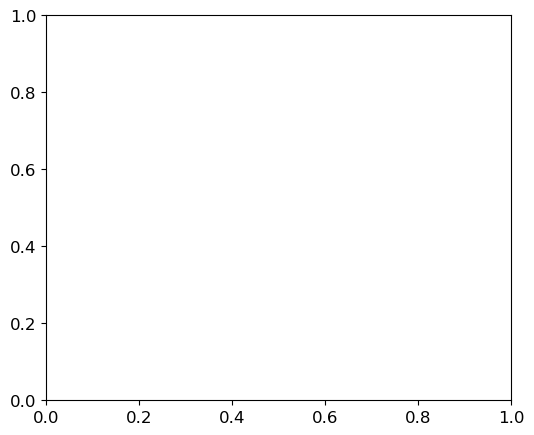

In [ ]:
hists = {}
corr_hists = {}
lumi = 17650/1000
energy = "13.6 TeV"
for zto, orders in events_dict.items():
    #zto = "Zto2Q" or "Zto2Nu"
    hists[zto] = {}
    corr_hists[zto] = {}
    for order, events in orders.items():
        #order = "LO" or "NLO"
        hists[zto][order] = {}
        corr_hists[zto][order] = {}
        legend = {}
        for sample in events:
            hists[zto][order][sample] = h_vpt[{"name": sample}]
            #corr_hists[zto][order][sample] = h_corr[{"name": sample}]
            
            if (zto == "Zto2Q"):
                legend[sample]= sample[12:]
            else:
                legend[sample]= sample[13:]
            
        hists[zto][order]["sum"] = sum([h for h in hists[zto][order].values()])
        #corr_hists[zto][order]["sum"] = sum([h for h in corr_hists[zto][order].values()])
        legend["sum"] = "All"
        
        plot_h(hists[zto][order], legend, density=False, title=f"{zto}: {order}, {lumi} fb-1, {energy}")
        #plot_h(corr_hists[zto][order], legend, density=False, title=f"{zto}: {order} with Run 2 correction")
        plot_h(hists[zto][order], legend, density=True, title=f"{zto}: {order}, {lumi} fb-1, {energy}")
        #plot_h(corr_hists[zto][order], legend, density=True, title=f"{zto}: {order} with Run 2 correction")
        
    plot_compare(hists[zto], corr_hists[zto], density=False, title=f"{zto}, {lumi} fb-1, {energy}")
    plot_compare(hists[zto], corr_hists[zto], density=True, title=f"{zto}, {lumi} fb-1, {energy}")




In [ ]:

package_path = Path("/Users/gbibim/Here/hpt/src/hpt")
def add_VJets_kFactors(weights, genpart, dataset):
    """Revised version of add_VJets_NLOkFactor, for both NLO EW and ~NNLO QCD"""

    vjets_kfactors = correctionlib.CorrectionSet.from_file(
        str(package_path / "corrections/ULvjets_corrections.json")
    )

In [ ]:

def kfactor(hists, corr_hists, title):
    legend = ["Z(qq) NLO / Z(qq) LO", "Z(nunu) NLO / Z(nunu) LO"]
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for zto in ("Zto2Q", "Zto2Nu"):
        h1 = hists[zto]["NLO"]["sum"]
        h2 = hists[zto]["LO"]["sum"]
        hep.histplot(h1/h2, ax=ax, label=legend)

    h_num = hists["Zto2Nu"]["NLO"]["sum"]
    h_den = hists["Zto2Q"]["LO"]["sum"]
    hep.histplot(h_num*3.5/h_den, label="Z(nunu) NLO * 3.5 / Z(qq) LO")
    
    #ax.set_yscale("log")
    ax.set_title(title)
    ax.plot(x, corr_new, label="Z(ll) NLO * 6.93 / Z(qq) LO")
    ax.legend()

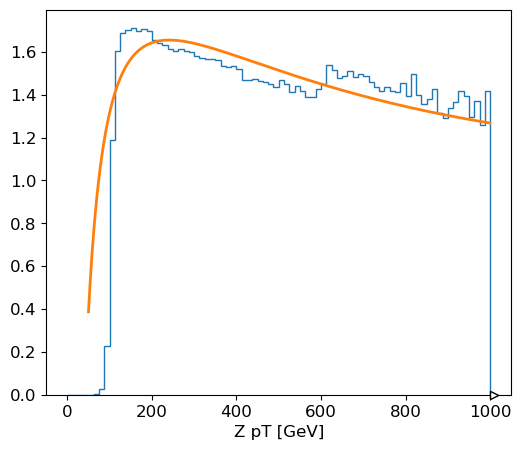

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
h_num = hists["Zto2Nu"]["NLO"]["sum"]
h_den = hists["Zto2Q"]["LO"]["sum"]
hep.histplot(h_num*3.5/h_den, label="Zto2Nu NLO/Zto2Q LO")
ax.plot(x, corr_new, label="Run 2 corr")

In [ ]:
corr

0         1.403276
1         1.443979
2         1.331669
3         1.452337
4         1.404352
            ...   
939149    1.378302
939150    1.449932
939151    1.406521
939152    1.449932
939153    1.363565
Name: 0, Length: 939154, dtype: float32

In [ ]:
x = np.arange(50, 1000, 1)

In [ ]:
corr_new = correction(x)

KeyError: 'NLO'

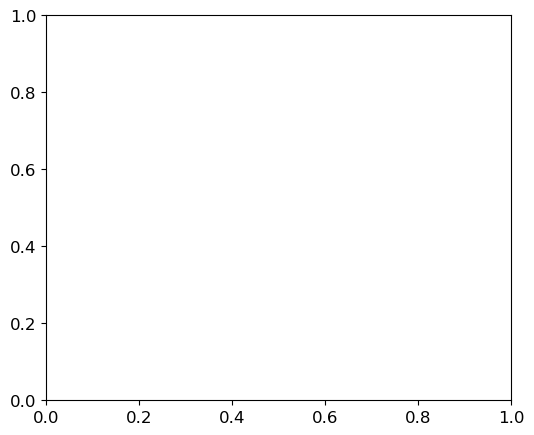

In [ ]:

kfactor(hists, corr_hists, title=f"k Factors, {lumi} fb-1, {energy}")
#run 2 NLO/LO correction
#label in the y axes

In [ ]:
h_cut_vpt.axes

(Regular(80, 0, 1000, name='pt', label='Z pT [GeV]'),
 StrCategory(['Zto2Nu-2Jets_PTNuNu-100to200_1J', 'Zto2Nu-2Jets_PTNuNu-100to200_2J', 'Zto2Nu-2Jets_PTNuNu-200to400_1J', 'Zto2Nu-2Jets_PTNuNu-200to400_2J', 'Zto2Nu-2Jets_PTNuNu-400to600_1J', 'Zto2Nu-2Jets_PTNuNu-400to600_2J', 'Zto2Nu-2Jets_PTNuNu-600_1J', 'Zto2Nu-2Jets_PTNuNu-600_2J'], growth=True, name='name'))

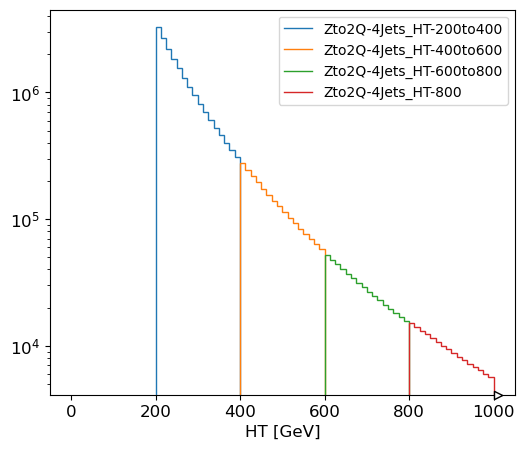

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for samples in hists["Zto2Q"]["LO"].keys():
    if samples == "sum": continue

    hep.histplot(h_cut_vpt[{"name":samples}], ax=ax, label=samples)
ax.set_yscale("log")
ax.set_xlabel("HT [GeV]")
ax.legend(fontsize=10)


# Stack for Z

In [10]:
sample_axis = hist.axis.StrCategory([], name="name", growth=True)  #samples
msd_axis = hist.axis.Regular(80, 40, 110, name="msd", label="mSD [GeV]")
xjj_axis = hist.axis.Regular(80, 0, 1, name="xjj", label="Xbb")
xbb_axis = hist.axis.Regular(80, 0, 1, name="xbb", label="Xjj")
proc_axis = hist.axis.StrCategory([], name="process", growth=True)  #processes
pt_axis = hist.axis.Regular(50, 200, 1000, name="pt", label="Jet $p_T$ [GeV]")
trig_axis = hist.axis.Regular(100, 0, 1, name="trigger", label="Trigger")
order_axis = hist.axis.StrCategory([], name="order", growth=True)  #order

In [61]:
import correctionlib
from pathlib import Path
import math
import re
import numpy as np

h_msd = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
h_msd_bb = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
h_msd_cc = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
h_msd_cs = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
h_msd_rest = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)  

# Discriminators
h_xjj = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xcc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_QCD = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xgg = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_avg = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to bb
h_xjj_bb = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xcc_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_QCD_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xgg_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_avg_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to cc
h_xjj_cc = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xcc_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_QCD_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xgg_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_avg_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to light quarks
h_xjj_rest = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xcc_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_QCD_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xgg_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_avg_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to cs
h_xjj_cs = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
h_xbb_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xcc_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_QCD_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_xgg_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
h_avg_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

for zto, orders in events_dict.items():
    #zto = "Zto2Q"
    print (zto)
    #orders = events_dict[zto]
    for order, events in orders.items():
        #order = "LO"
        #events = orders[order]
        for sample in events:
            #sample = "Zto2Q-4Jets_HT-200to400"
            weight = events[sample]["finalWeight"]
            #vpt = events[sample]["GenVPt"][0]
            msd = events[sample]["ak8FatJetmsoftdrop"][0]
            bb = events[sample]["GenVis_bb"][0]
            cc = events[sample]["GenVis_cc"][0]
            cs = events[sample]["GenVis_cs"][0]
            Txjj = events[sample]["ak8FatJetPNetTXjj"][0]
            Txbb = events[sample]["ak8FatJetPNetTXbb"][0]
            Txcc = events[sample]["ak8FatJetPNetTXcc"][0]
            Txgg = events[sample]["ak8FatJetPNetTXgg"][0]
            TQCD = events[sample]["ak8FatJetPNetQCD"][0]
            Tavg = (Txjj+Txcc)/2
            #print(Txjj)
            selection = TQCD>0.3

            #  ALL Z/W 
            #h_vpt.fill(vpt, sample, order, weight=weight)
            h_msd.fill(msd[selection], zto, order, sample, weight=weight[selection])
            h_xjj.fill(Txjj[selection], zto, order, sample, weight=weight[selection])
            h_xbb.fill(Txbb[selection], zto, order, sample, weight=weight[selection])
            h_xcc.fill(Txcc[selection], zto, order, sample, weight=weight[selection])
            h_xgg.fill(Txgg[selection], zto, order, sample, weight=weight[selection])
            h_QCD.fill(TQCD[selection], zto, order, sample, weight=weight[selection]) 
            h_avg.fill(Tavg[selection], zto, order, sample, weight=weight[selection])

            # Z to bb
            h_msd_bb.fill(msd[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_xjj_bb.fill(Txjj[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_xbb_bb.fill(Txbb[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_xcc_bb.fill(Txcc[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_xgg_bb.fill(Txgg[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_QCD_bb.fill(TQCD[bb&selection], zto, order, sample, weight=weight[bb&selection])
            h_avg_bb.fill(Tavg[bb&selection], zto, order, sample, weight=weight[bb&selection])
            #h_vpt_bb.fill(vpt[bb], sample, order, weight=weight[bb])

            # Z to cc
            h_msd_cc.fill(msd[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_xjj_cc.fill(Txjj[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_xbb_cc.fill(Txbb[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_xcc_cc.fill(Txcc[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_xgg_cc.fill(Txgg[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_QCD_cc.fill(TQCD[cc&selection], zto, order, sample, weight=weight[cc&selection])
            h_avg_cc.fill(Tavg[cc&selection], zto, order, sample, weight=weight[cc&selection])
            #h_vpt_cc.fill(vpt[cc], sample, order, weight=weight[cc])

            # W to cs
            h_msd_cs.fill(msd[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_xjj_cs.fill(Txjj[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_xbb_cs.fill(Txbb[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_xcc_cs.fill(Txcc[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_xgg_cs.fill(Txgg[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_QCD_cs.fill(TQCD[cs&selection], zto, order, sample, weight=weight[cs&selection])
            h_avg_cs.fill(Tavg[cs&selection], zto, order, sample, weight=weight[cs&selection])

            # Everything else
            h_msd_rest.fill(msd[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_xjj_rest.fill(Txjj[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_xbb_rest.fill(Txbb[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_xcc_rest.fill(Txcc[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_xgg_rest.fill(Txgg[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_QCD_rest.fill(TQCD[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            h_avg_rest.fill(Tavg[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            

Zto2Q
Wto2Q


Text(0.5, 1.0, 'Zto2Q: LO vs NLO, 13.6 TeV, 17650 fb-1')

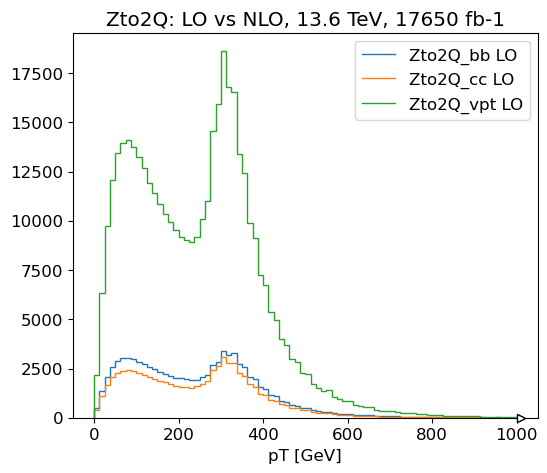

In [ ]:
h_bb_LO = h_vpt_bb[{"order":"LO" , "name": sum}]
h_bb_NLO = h_vpt_bb[{"order":"NLO" , "name": sum}]
h_cc_LO = h_vpt_cc[{"order":"LO" , "name": sum}]
h_cc_NLO = h_vpt_cc[{"order":"NLO" , "name": sum}]
h_vpt_LO = h_vpt[{"order":"LO" , "name": sum}]
h_vpt_NLO = h_vpt[{"order":"NLO" , "name": sum}]
labels = ["Zto2Q_bb LO",  "Zto2Q_cc LO",  "Zto2Q_vpt LO"]
h = [h_bb_LO, h_cc_LO, h_vpt_LO, ]
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
hep.histplot(h, ax=ax, label=labels, density=False)
ax.set_xlabel("pT [GeV]")
ax.legend()
#ax.set_yscale("log")
ax.set_title("Zto2Q: LO vs NLO, 13.6 TeV, 17650 fb-1")
ax.title

# Stack of mSD for Z and W with different quark content

In [ ]:
h_msd_cc.axes

(Regular(80, 40, 110, name='msd', label='mSD [GeV]'),
 StrCategory(['Zto2Q'], growth=True, name='process'),
 StrCategory(['LO', 'NLO'], growth=True, name='order'),
 StrCategory(['Zto2Q-4Jets_HT-200to400', 'Zto2Q-4Jets_HT-400to600', 'Zto2Q-4Jets_HT-600to800', 'Zto2Q-4Jets_HT-800', 'Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-600_2J'], growth=True, name='name'))

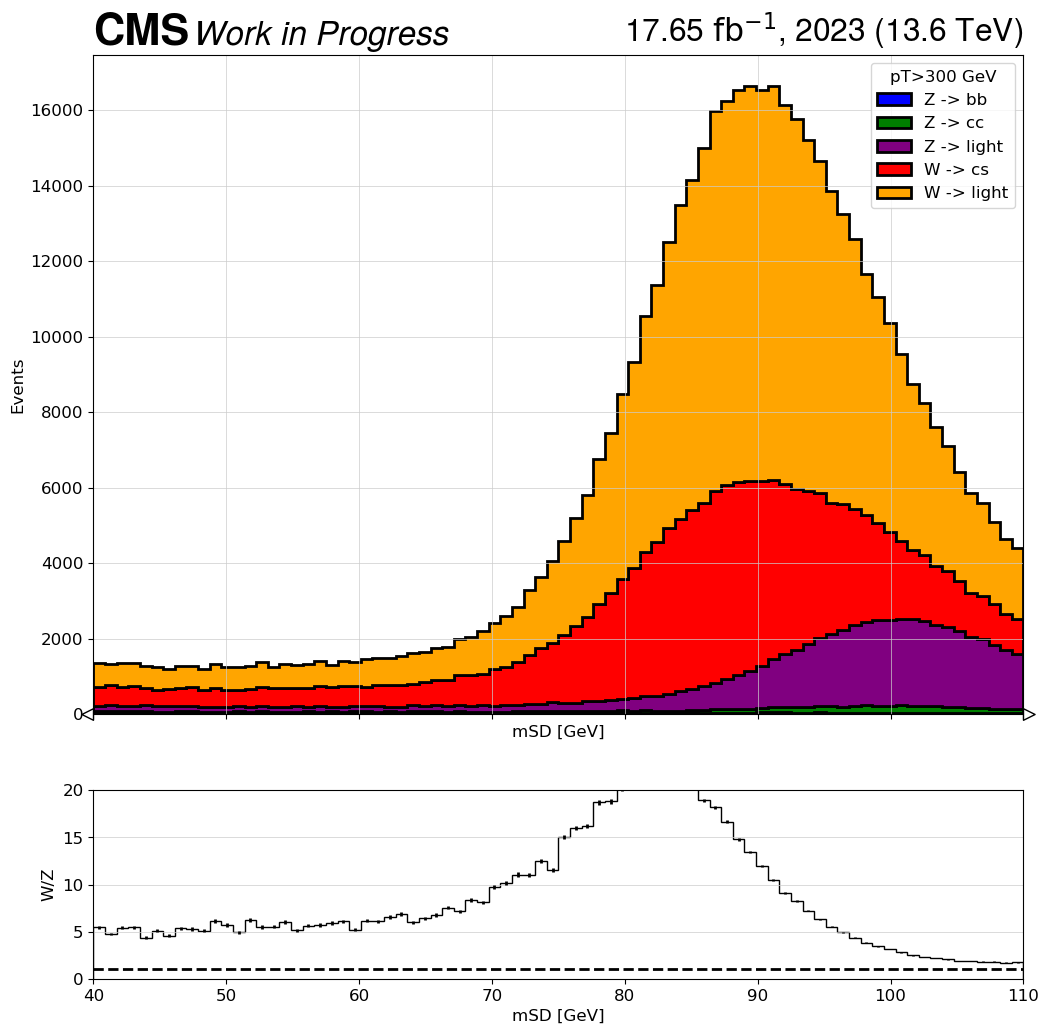

In [ ]:

from hist.intervals import ratio_uncertainty

h_z_bb = h_msd_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = h_msd_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = h_msd_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = h_msd_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = h_msd_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]


#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']


fig, (ax, rax) = plt.subplots(
            2,
            1,
            figsize=(12, 12),
            gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
            sharex=True,
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends, color=colors, density=False, histtype="fill", edgecolor="black",
linewidth=2) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_msd[{"process":sum, "order":"NLO", "name": sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "Data", density=True)
ax.legend()
#ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(40, 110)
ax.set_xlabel("mSD [GeV]")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )
# 2nd panel
h_z = h_msd[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w = h_msd[{"process":"Wto2Q", "order":"NLO", "name": sum}]
bg_total = h_z ## , h_qcd, h_diboson, h_tt     Z
tot_val = bg_total.values()
tot_val_zero_mask = tot_val == 0
tot_val[tot_val_zero_mask] = 1
data_val = h_w.values()
data_val[tot_val_zero_mask] = 1
yerr = ratio_uncertainty(data_val, tot_val, "poisson")
yvalue = data_val / tot_val

hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="step", color="black")
rax.set_ylabel("W/Z")
rax.set_ylim(0, 20)
rax.set_xlabel("mSD [GeV]")
rax.set_xlim(40, 110)
rax.grid(axis="y")
rax.axhline(1, color="black", linestyle="--")
plt.show()

#plt.show()

# Density plot of mSD (not stacked) w/o ratio

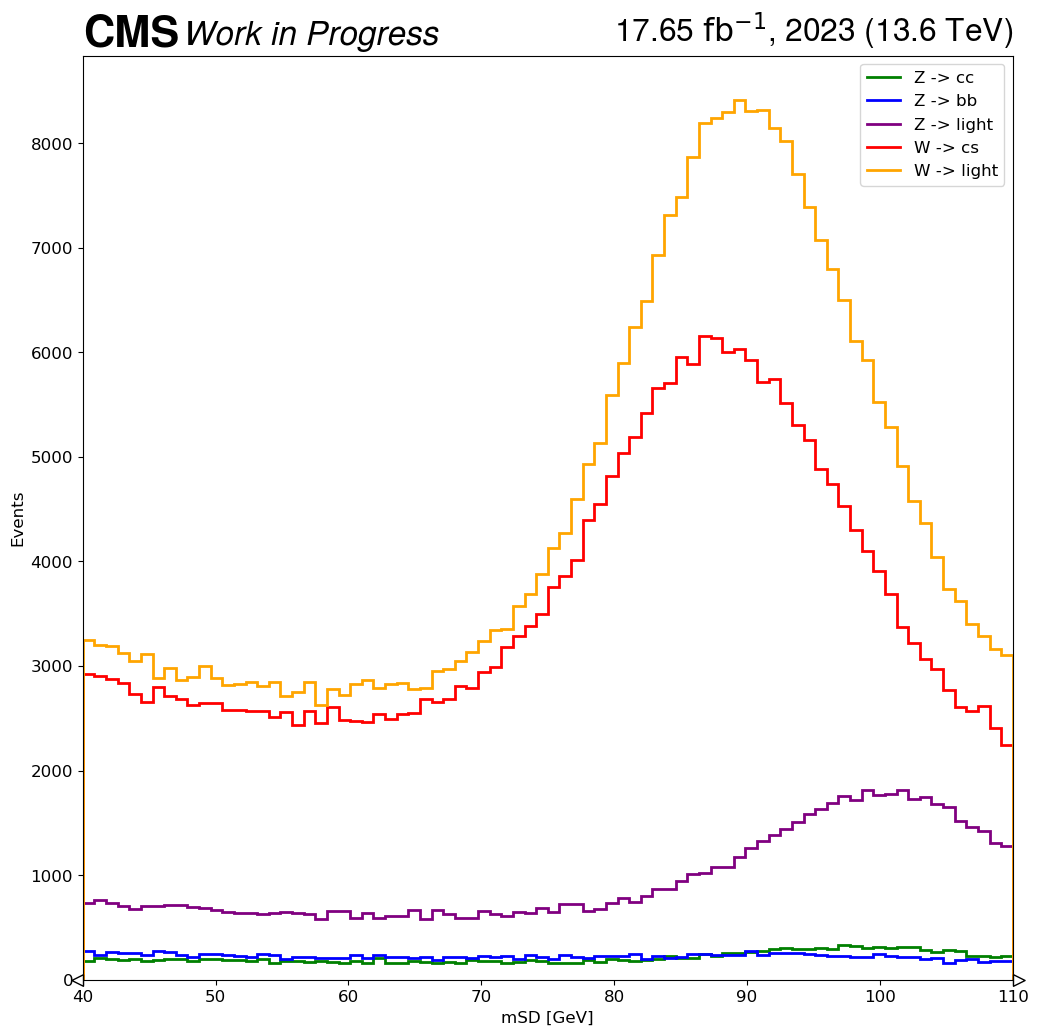

In [ ]:
from hist.intervals import ratio_uncertainty

h_z_bb = h_msd_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = h_msd_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = h_msd_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = h_msd_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = h_msd_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]

h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create figure with only one axis
fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )

# 1st panel (main plot)
ax.set_ylabel("Events")

# Plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=False, linewidth=2)

# Legend and labels
ax.legend()
ax.set_xlim(40, 110)
ax.set_xlabel("mSD [GeV]")

# CMS Label
hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# Show the plot
plt.show()

In [ ]:
h_xjj_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]

Hist(Regular(80, 0, 1, name='xjj', label='Xbb'), storage=Double()) # Sum: 99587.33032669382

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Work in Progress'),
 supptext: Custom Text(1.012, 1, ''))

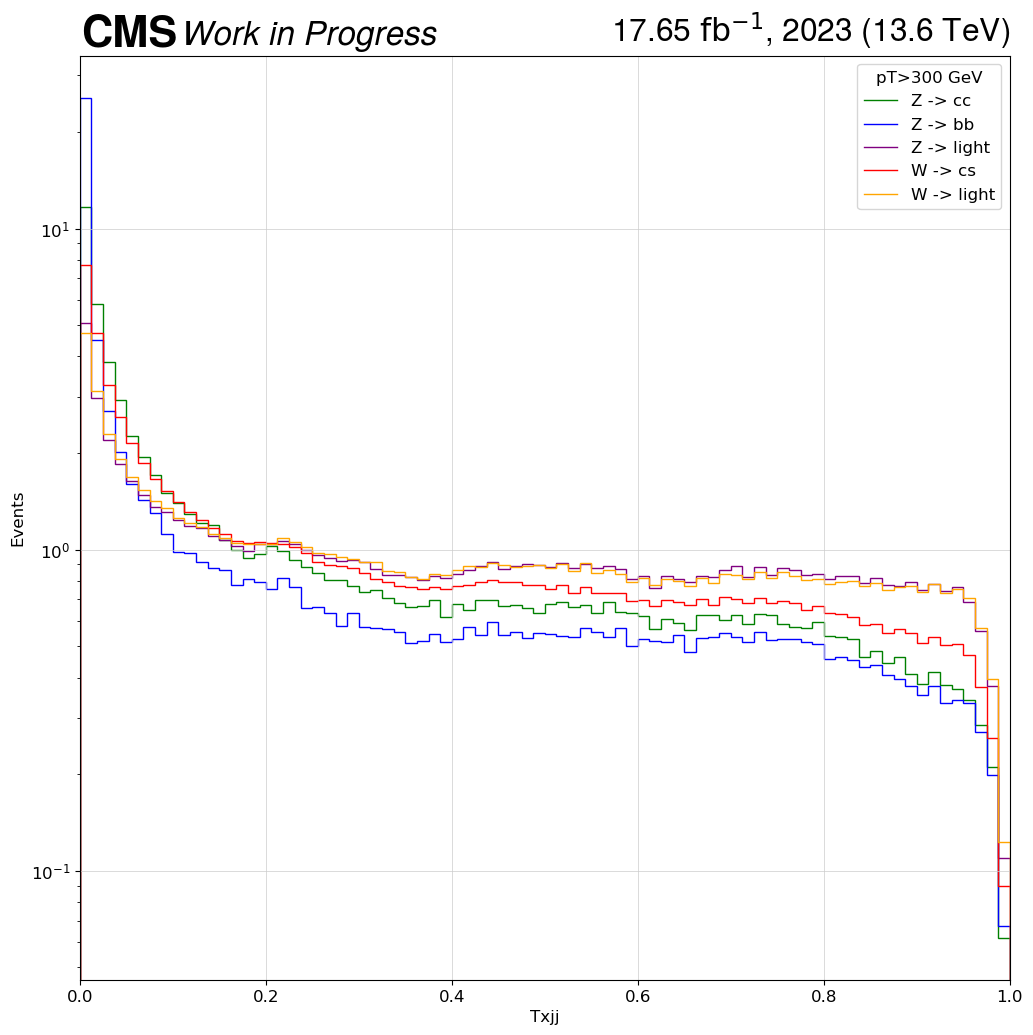

In [ ]:
# XJJ
from hist.intervals import ratio_uncertainty

h_z_bb = h_xjj_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = h_xjj_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = h_xjj_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = h_xjj_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = h_xjj_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]


#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']


fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=True) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_xjj[{"process":sum, "order":"NLO", "name":sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "sum of all xjj", density=True)
ax.legend()
ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(0, 1)
ax.set_xlabel("Txjj")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )



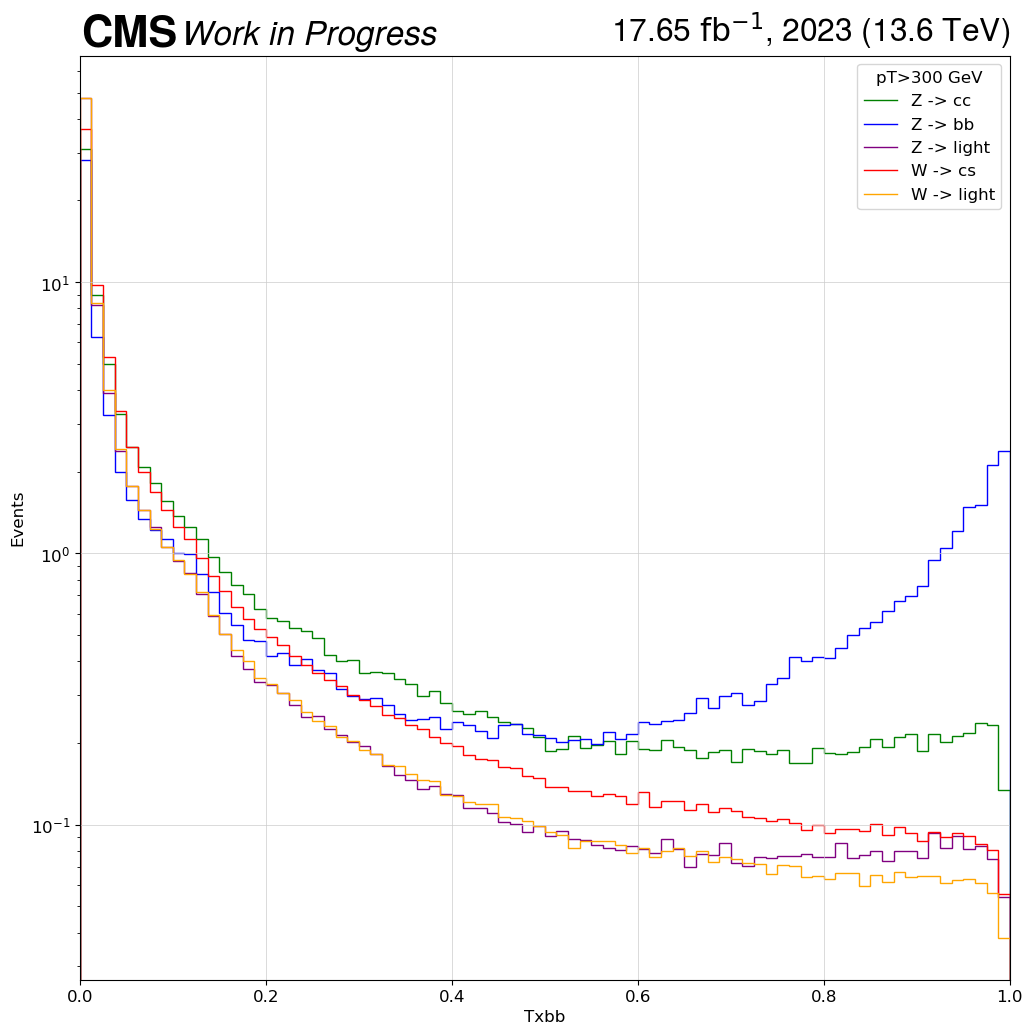

In [ ]:
# XBB
from hist.intervals import ratio_uncertainty

h_z_bb = h_xbb_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = h_xbb_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = h_xbb_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = h_xbb_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = h_xbb_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]


#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']


fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=True) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_xbb[{"process":sum, "order":"NLO", "name":sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "sum of all xjj", density=True)
ax.legend()
ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(0, 1)
ax.set_xlabel("Txbb")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# 2nd panel
plt.show()


# Xcc 

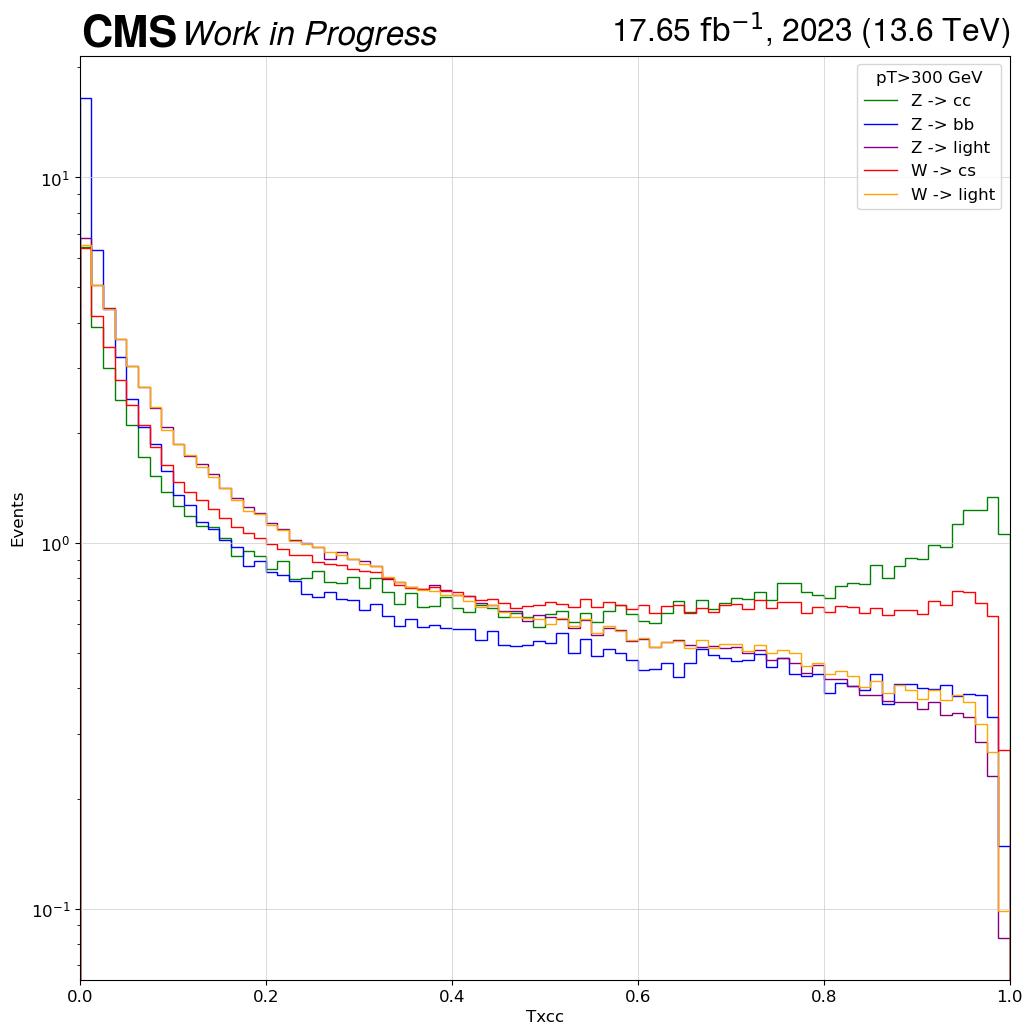

In [ ]:
# Xcc
from hist.intervals import ratio_uncertainty

h_z_bb = h_xcc_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = h_xcc_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = h_xcc_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = h_xcc_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = h_xcc_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]


#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']


fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=True) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_xbb[{"process":sum, "order":"NLO", "name":sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "sum of all xjj", density=True)
ax.legend()
ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(0, 1)
ax.set_xlabel("Txcc")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# 2nd panel
plt.show()


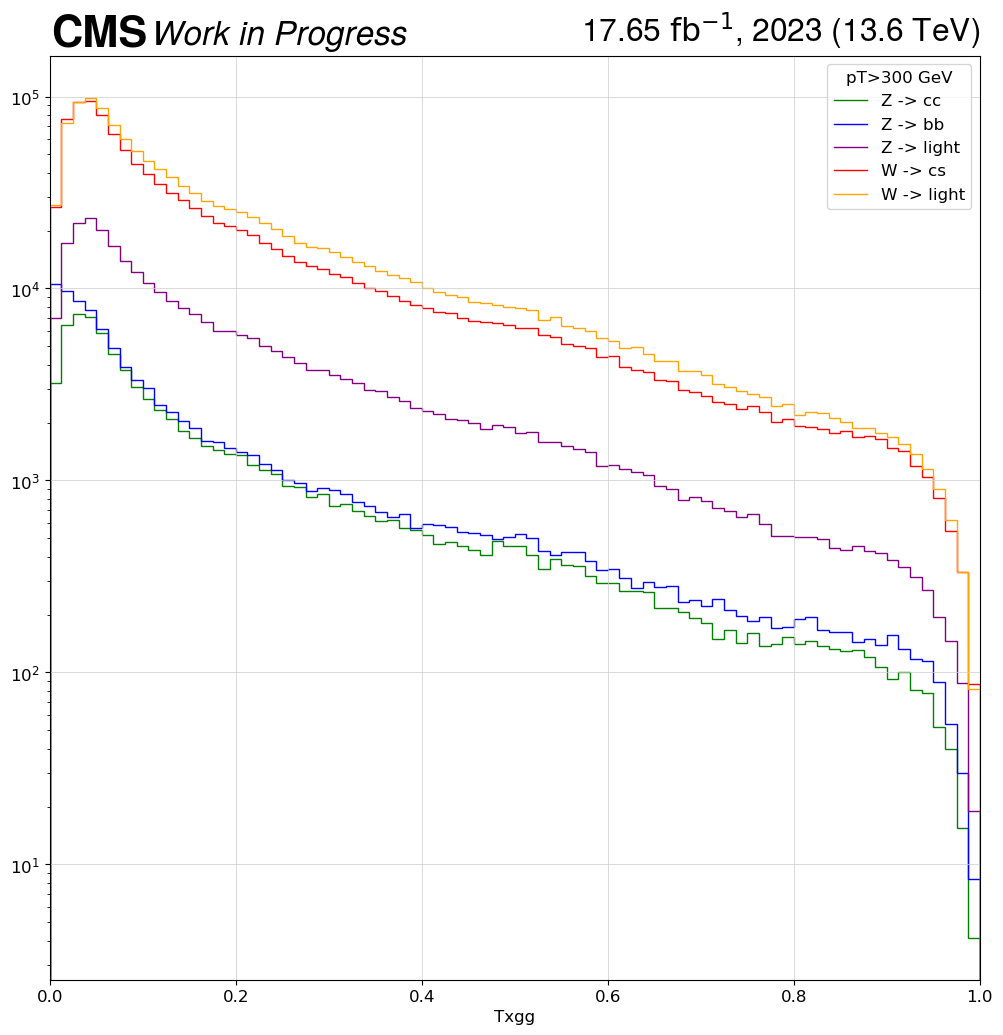

In [ ]:
# Xgg
from hist.intervals import ratio_uncertainty

h_z_bb = h_xgg_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = h_xgg_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = h_xgg_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = h_xgg_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = h_xgg_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]
#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']

fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )
# 1st panel
#ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=False) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_xbb[{"process":sum, "order":"NLO", "name":sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "sum of all xjj", density=True)
ax.legend()
ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(0, 1)
ax.set_xlabel("Txgg")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# 2nd panel
plt.show()


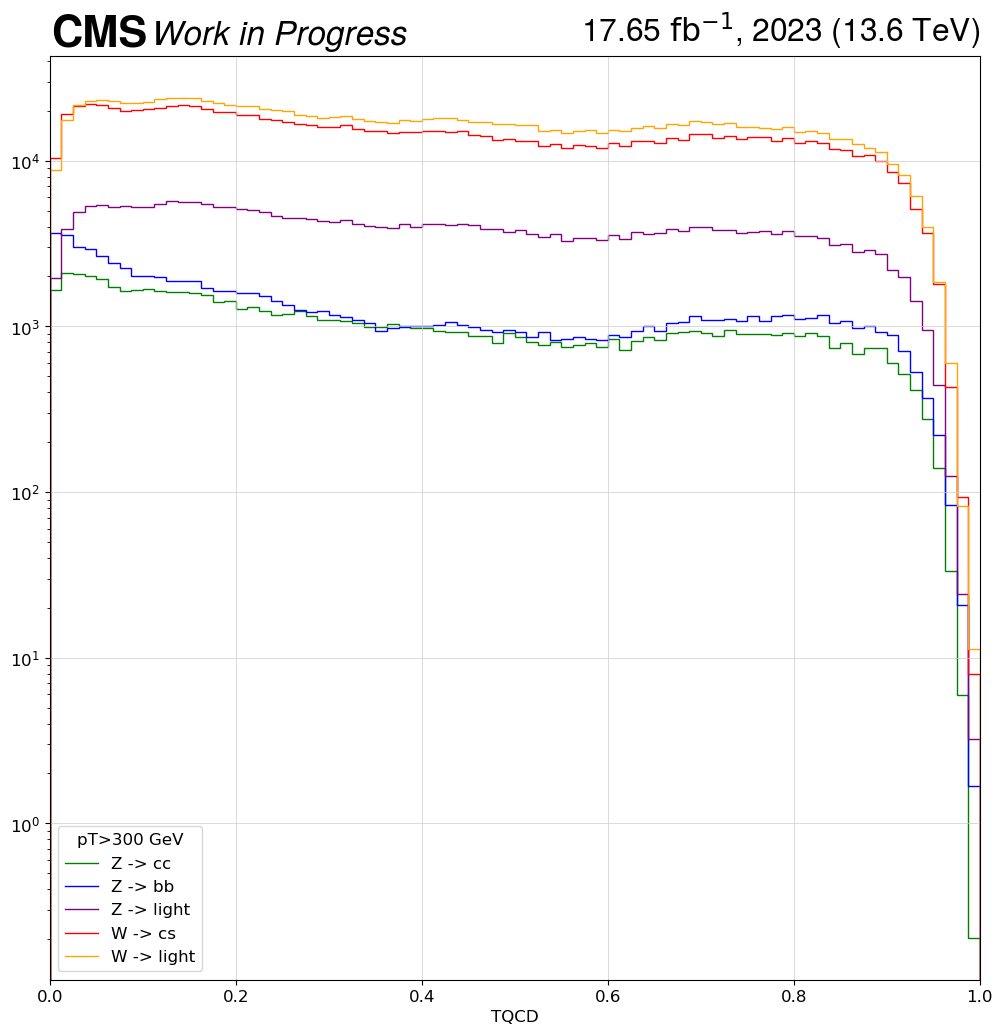

In [ ]:
# QCD
# Xgg
from hist.intervals import ratio_uncertainty

h_z_bb = h_QCD_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = h_QCD_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = h_QCD_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = h_QCD_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = h_QCD_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]
#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']

fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )
# 1st panel
#ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=False) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_xbb[{"process":sum, "order":"NLO", "name":sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "sum of all xjj", density=True)
ax.legend()
ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(0, 1)
ax.set_xlabel("TQCD")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# 2nd panel
plt.show()


# PartT discriminators

In [54]:
import correctionlib
from pathlib import Path
import math
import re
import numpy as np

t_msd = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
t_msd_bb = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
t_msd_cc = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
t_msd_cs = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
t_msd_rest = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)  

t_reg = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
t_reg_bb = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
t_reg_cc = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
t_reg_cs = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis)
t_reg_rest = hist.Hist(msd_axis, proc_axis, order_axis, sample_axis) 

# Discriminators
t_xqq = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
t_xbb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_QCD = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xgg = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_W = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_Z = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_V = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to bb
t_xqq_bb = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
t_xbb_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcc_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_QCD_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xgg_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcs_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_W_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_Z_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_V_bb = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to cc
t_xqq_cc = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
t_xbb_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcc_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_QCD_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xgg_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcs_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_W_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_Z_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_V_cc = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to light quarks
t_xqq_rest = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
t_xbb_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcc_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_QCD_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xgg_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcs_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_W_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_Z_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_V_rest = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

# Discriminators for Z/W to cs
t_xqq_cs = hist.Hist(xjj_axis, proc_axis, order_axis, sample_axis)
t_xbb_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcc_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_QCD_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xgg_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
t_xcs_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_W_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_Z_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)
T_V_cs = hist.Hist(xbb_axis, proc_axis, order_axis, sample_axis)

for zto, orders in events_dict.items():
    #zto = "Zto2Q"
    print (zto)
    #orders = events_dict[zto]
    for order, events in orders.items():
        #order = "LO"
        #events = orders[order]
        for sample in events:
            #sample = "Zto2Q-4Jets_HT-200to400"
            weight = events[sample]["finalWeight"]
            #vpt = events[sample]["GenVPt"][0]
            msd = events[sample]["ak8FatJetmsoftdrop"][0]
            bb = events[sample]["GenVis_bb"][0]
            cc = events[sample]["GenVis_cc"][0]
            cs = events[sample]["GenVis_cs"][0]
            Pxqq = events[sample]["ak8FatJetParTPXqq"][0]
            Pxbb = events[sample]["ak8FatJetParTPXbb"][0]
            Pxcc = events[sample]["ak8FatJetParTPXcc"][0]
            Pxgg = events[sample]["ak8FatJetParTPXgg"][0]
            Pxcs = events[sample]["ak8FatJetParTPXcs"][0]
            PQCD = events[sample]["ak8FatJetParTPQCD1HF"][0] + events[sample]["ak8FatJetParTPQCD2HF"][0] + events[sample]["ak8FatJetParTPQCD0HF"][0]

            Txqq = (Pxqq + Pxcc) / (Pxqq + Pxcc + PQCD)
            Txbb = Pxbb / (Pxbb + PQCD)
            Txcc = Pxcc / (Pxcc + PQCD)
            Txgg = Pxgg / (Pxgg + PQCD)
            Txcs = Pxcs / (Pxcs + PQCD)
            TW = (Pxcs + Pxqq) / (Pxcs + Pxqq + PQCD + Pxgg + Pxbb + Pxcc)
            TZ = (Pxbb + Pxcc + Pxqq) / (Pxbb + Pxcc + Pxqq + PQCD + Pxgg + Pxcs)
            #TW = (Pxcs + Pxqq) / (Pxcs + Pxqq + PQCD)
            #TZ = (Pxbb + Pxcc + Pxqq) / (Pxbb + Pxcc + Pxqq + PQCD)
            TV = (Pxbb + Pxcc + Pxqq + Pxcs) / (Pxbb + Pxcc + Pxqq + Pxcs + PQCD)

            #print(Txjj)
            selection = (msd>40) & (TV>0.3)

            #  ALL Z/W 
            #h_vpt.fill(vpt, sample, order, weight=weight)
            t_msd.fill(msd[selection], zto, order, sample, weight=weight[selection])
            t_reg.fill(msd[selection], zto, order, sample, weight=weight[selection])
            t_xqq.fill(Txqq[selection], zto, order, sample, weight=weight[selection])
            t_xbb.fill(Txbb[selection], zto, order, sample, weight=weight[selection])
            t_xcc.fill(Txcc[selection], zto, order, sample, weight=weight[selection])
            t_xcs.fill(Txcs[selection], zto, order, sample, weight=weight[selection])
            t_xgg.fill(Txgg[selection], zto, order, sample, weight=weight[selection])
            t_QCD.fill(PQCD[selection], zto, order, sample, weight=weight[selection])
            T_W.fill(TW[selection], zto, order, sample, weight=weight[selection])
            T_Z.fill(TZ[selection], zto, order, sample, weight=weight[selection])
            T_V.fill(TV[selection], zto, order, sample, weight=weight[selection])

            # Z to bb
            t_msd_bb.fill(msd[bb&selection], zto, order, sample, weight=weight[bb&selection])
            t_reg_bb.fill(msd[bb&selection], zto, order, sample, weight=weight[bb&selection])
            t_xqq_bb.fill(Txqq[bb&selection], zto, order, sample, weight=weight[bb&selection])
            t_xbb_bb.fill(Txbb[bb&selection], zto, order, sample, weight=weight[bb&selection])
            t_xcc_bb.fill(Txcc[bb&selection], zto, order, sample, weight=weight[bb&selection])
            t_xcs_bb.fill(Txcs[bb&selection], zto, order, sample, weight=weight[bb&selection])
            t_xgg_bb.fill(Txgg[bb&selection], zto, order, sample, weight=weight[bb&selection])
            t_QCD_bb.fill(PQCD[bb&selection], zto, order, sample, weight=weight[bb&selection])
            T_W_bb.fill(TW[bb&selection], zto, order, sample, weight=weight[bb&selection])
            T_Z_bb.fill(TZ[bb&selection], zto, order, sample, weight=weight[bb&selection])
            T_V_bb.fill(TV[bb&selection], zto, order, sample, weight=weight[bb&selection])
            #h_vpt_bb.fill(vpt[bb], sample, order, weight=weight[bb])

            # Z to cc
            t_msd_cc.fill(msd[cc&selection], zto, order, sample, weight=weight[cc&selection])
            t_reg_cc.fill(msd[cc&selection], zto, order, sample, weight=weight[cc&selection])
            t_xqq_cc.fill(Txqq[cc&selection], zto, order, sample, weight=weight[cc&selection])
            t_xbb_cc.fill(Txbb[cc&selection], zto, order, sample, weight=weight[cc&selection])
            t_xcc_cc.fill(Txcc[cc&selection], zto, order, sample, weight=weight[cc&selection])
            t_xcs_cc.fill(Txcs[cc&selection], zto, order, sample, weight=weight[cc&selection])
            t_xgg_cc.fill(Txgg[cc&selection], zto, order, sample, weight=weight[cc&selection])
            t_QCD_cc.fill(PQCD[cc&selection], zto, order, sample, weight=weight[cc&selection])
            T_W_cc.fill(TW[cc&selection], zto, order, sample, weight=weight[cc&selection])
            T_Z_cc.fill(TZ[cc&selection], zto, order, sample, weight=weight[cc&selection])
            T_V_cc.fill(TV[cc&selection], zto, order, sample, weight=weight[cc&selection])
            #h_vpt_cc.fill(vpt[cc], sample, order, weight=weight[cc])

            # W to cs
            t_msd_cs.fill(msd[cs&selection], zto, order, sample, weight=weight[cs&selection])
            t_reg_cs.fill(msd[cs&selection], zto, order, sample, weight=weight[cs&selection])
            t_xqq_cs.fill(Txqq[cs&selection], zto, order, sample, weight=weight[cs&selection])
            t_xbb_cs.fill(Txbb[cs&selection], zto, order, sample, weight=weight[cs&selection])
            t_xcc_cs.fill(Txcc[cs&selection], zto, order, sample, weight=weight[cs&selection])
            t_xcs_cs.fill(Txcs[cs&selection], zto, order, sample, weight=weight[cs&selection])
            t_xgg_cs.fill(Txgg[cs&selection], zto, order, sample, weight=weight[cs&selection])
            t_QCD_cs.fill(PQCD[cs&selection], zto, order, sample, weight=weight[cs&selection])
            T_W_cs.fill(TW[cs&selection], zto, order, sample, weight=weight[cs&selection])
            T_Z_cs.fill(TZ[cs&selection], zto, order, sample, weight=weight[cs&selection])
            T_V_cs.fill(TV[cs&selection], zto, order, sample, weight=weight[cs&selection])

            # Everything else
            t_msd_rest.fill(msd[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            t_reg_rest.fill(msd[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            t_xqq_rest.fill(Txqq[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            t_xbb_rest.fill(Txbb[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            t_xcc_rest.fill(Txcc[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            t_xcs_rest.fill(Txcs[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            t_xgg_rest.fill(Txgg[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            t_QCD_rest.fill(PQCD[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            T_W_rest.fill(TW[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            T_Z_rest.fill(TZ[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            T_V_rest.fill(TV[(~(bb | cc | cs))&selection], zto, order, sample, weight=weight[(~(bb | cc | cs))&selection])
            

Zto2Q
Wto2Q


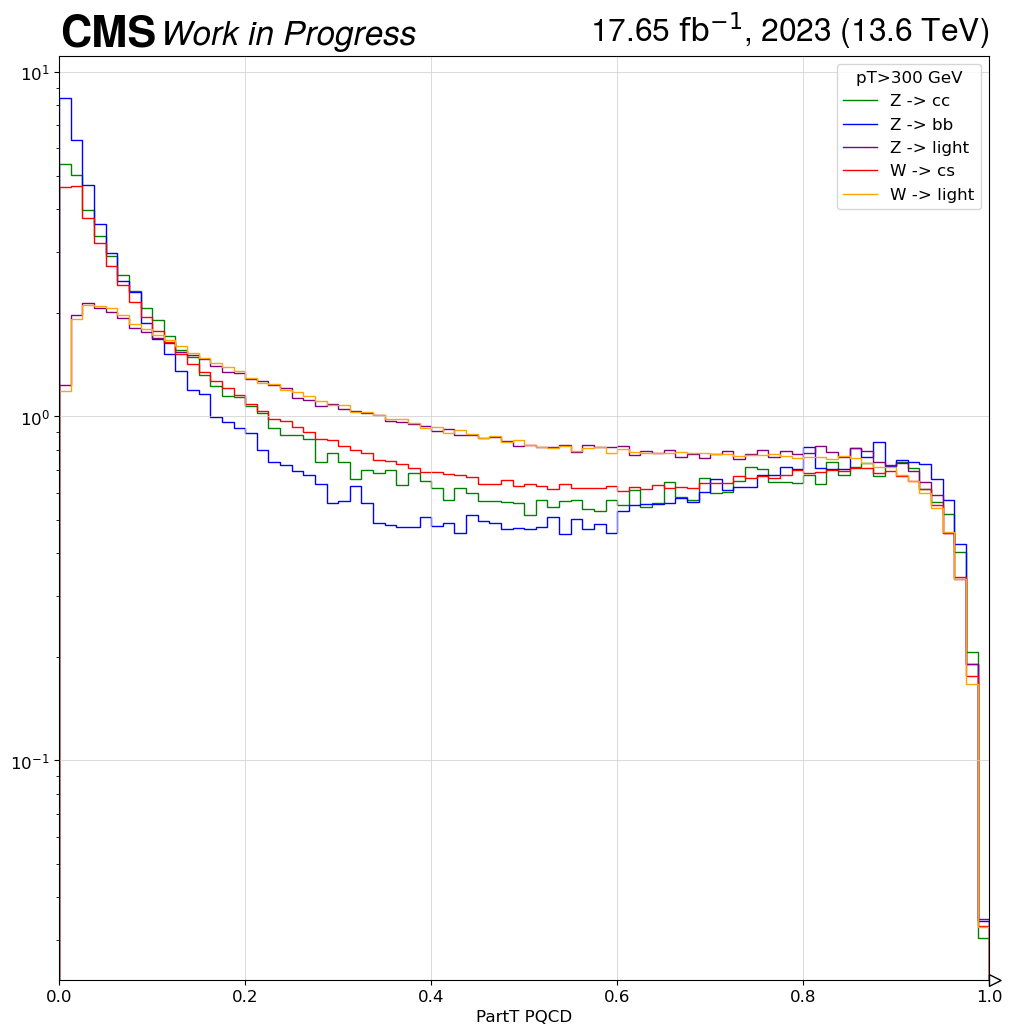

In [17]:
# PQCD
from hist.intervals import ratio_uncertainty

h_z_bb = t_QCD_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = t_QCD_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = t_QCD_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = t_QCD_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = t_QCD_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]
#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']

fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )
# 1st panel
#ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=True) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_xbb[{"process":sum, "order":"NLO", "name":sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "sum of all xjj", density=True)
ax.legend()
ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(0, 1)
ax.set_xlabel("PartT PQCD")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# 2nd panel
plt.show()


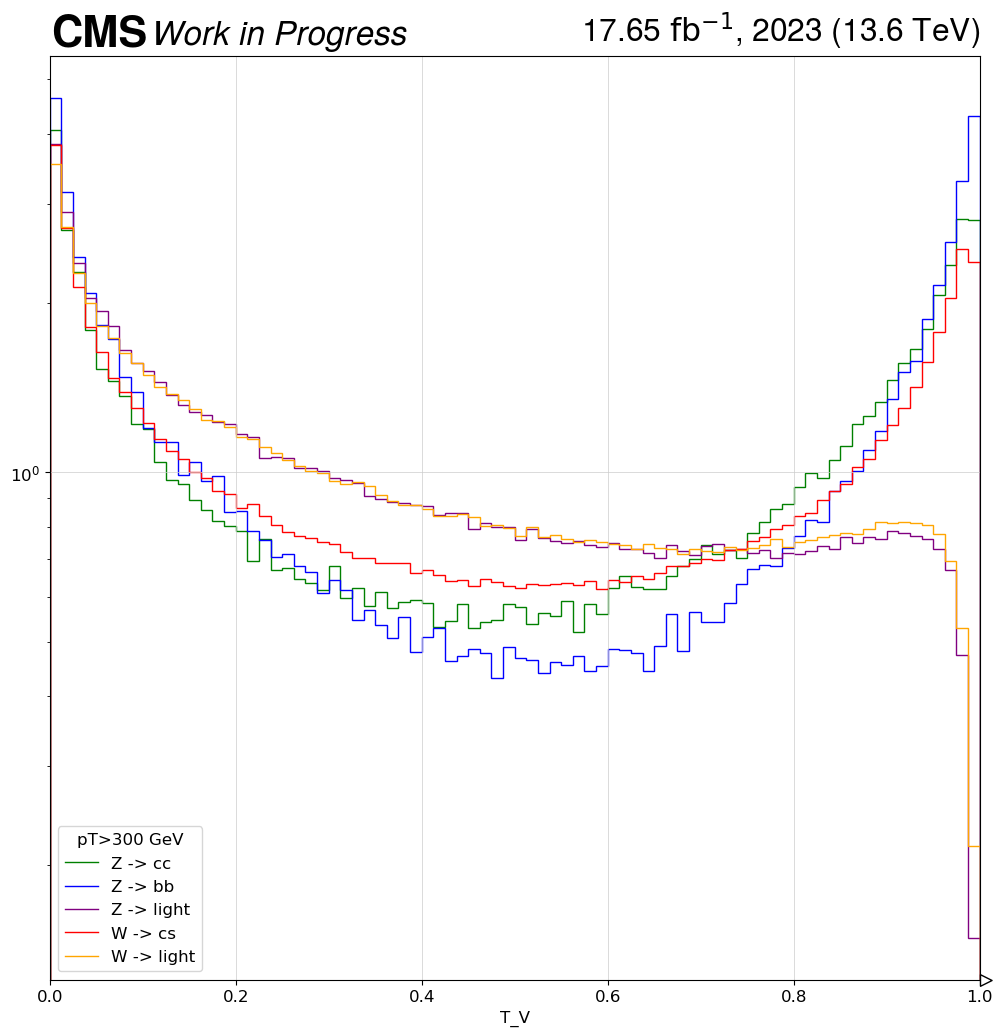

In [26]:
# T_V
from hist.intervals import ratio_uncertainty

h_z_bb = T_V_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = T_V_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = T_V_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = T_V_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = T_V_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]
#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']

fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )
# 1st panel
#ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=True) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_xbb[{"process":sum, "order":"NLO", "name":sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "sum of all xjj", density=True)
ax.legend()
ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(0, 1)
ax.set_xlabel("T_V")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# 2nd panel
plt.show()


# Stack

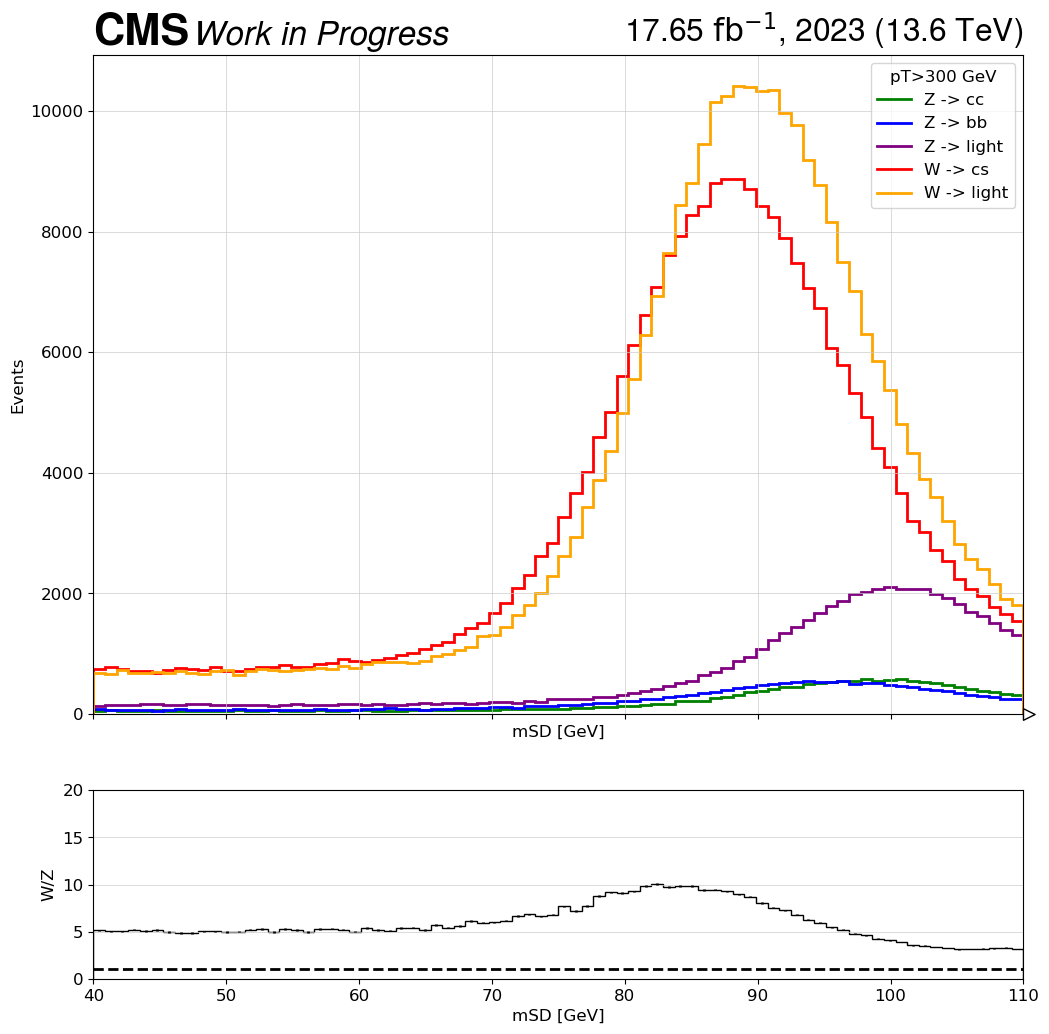

In [55]:

from hist.intervals import ratio_uncertainty

h_z_bb = t_msd_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = t_msd_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = t_msd_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = t_msd_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = t_msd_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]


#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']


fig, (ax, rax) = plt.subplots(
            2,
            1,
            figsize=(12, 12),
            gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
            sharex=True,
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=False,  
linewidth=2) ##h_qcd, h_diboson, h_tt, histtype="fill", edgecolor="black",

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_msd[{"process":sum, "order":"NLO", "name": sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "Data", density=True)
ax.legend()
#ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(40, 110)
ax.set_xlabel("mSD [GeV]")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )
# 2nd panel
h_z = h_msd[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w = h_msd[{"process":"Wto2Q", "order":"NLO", "name": sum}]
bg_total = h_z ## , h_qcd, h_diboson, h_tt     Z
tot_val = bg_total.values()
tot_val_zero_mask = tot_val == 0
tot_val[tot_val_zero_mask] = 1
data_val = h_w.values()
data_val[tot_val_zero_mask] = 1
yerr = ratio_uncertainty(data_val, tot_val, "poisson")
yvalue = data_val / tot_val

hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="step", color="black")
rax.set_ylabel("W/Z")
rax.set_ylim(0, 20)
rax.set_xlabel("mSD [GeV]")
rax.set_xlim(40, 110)
rax.grid(axis="y")
rax.axhline(1, color="black", linestyle="--")
plt.show()

#plt.show()

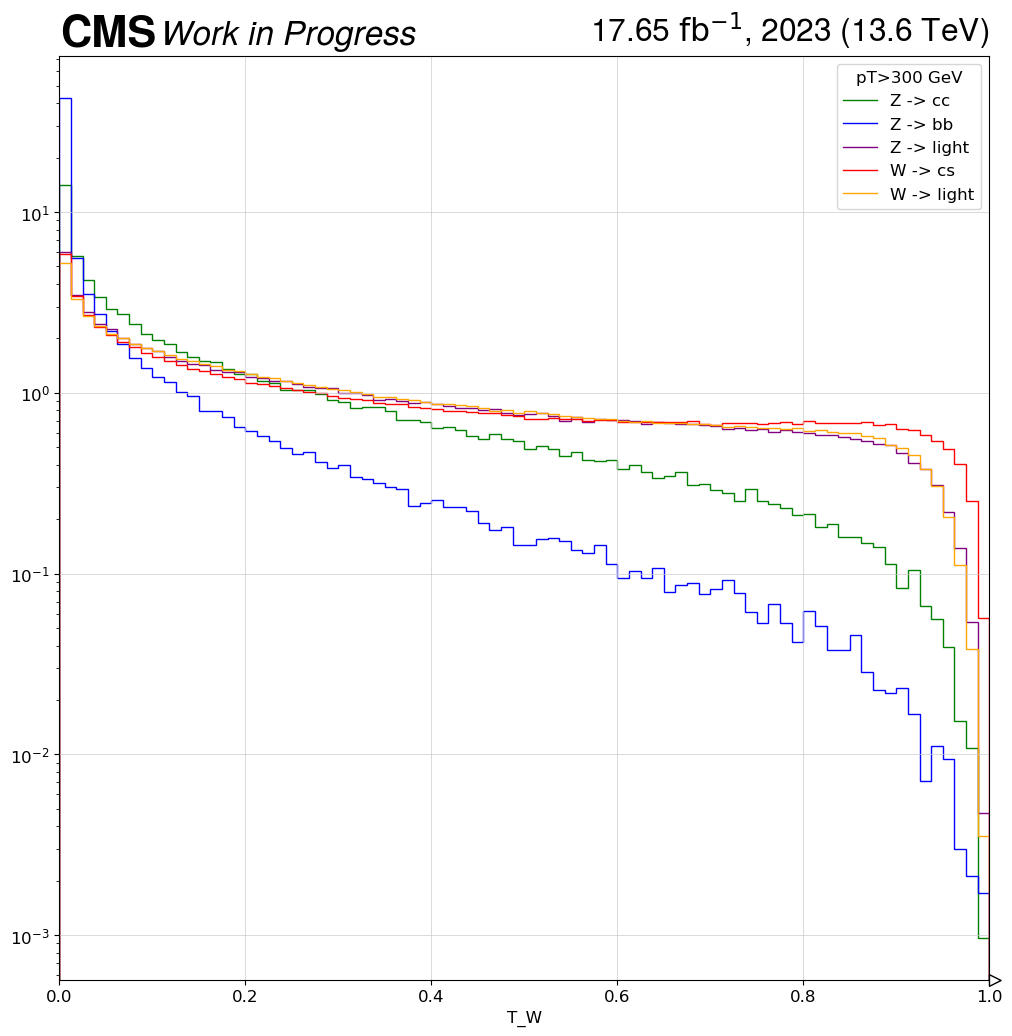

In [28]:
# T_W right
from hist.intervals import ratio_uncertainty

h_z_bb = T_W_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = T_W_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = T_W_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = T_W_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = T_W_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]
#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']

fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )
# 1st panel
#ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=True) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_xbb[{"process":sum, "order":"NLO", "name":sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "sum of all xjj", density=True)
ax.legend()
ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(0, 1)
ax.set_xlabel("T_W")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# 2nd panel
plt.show()


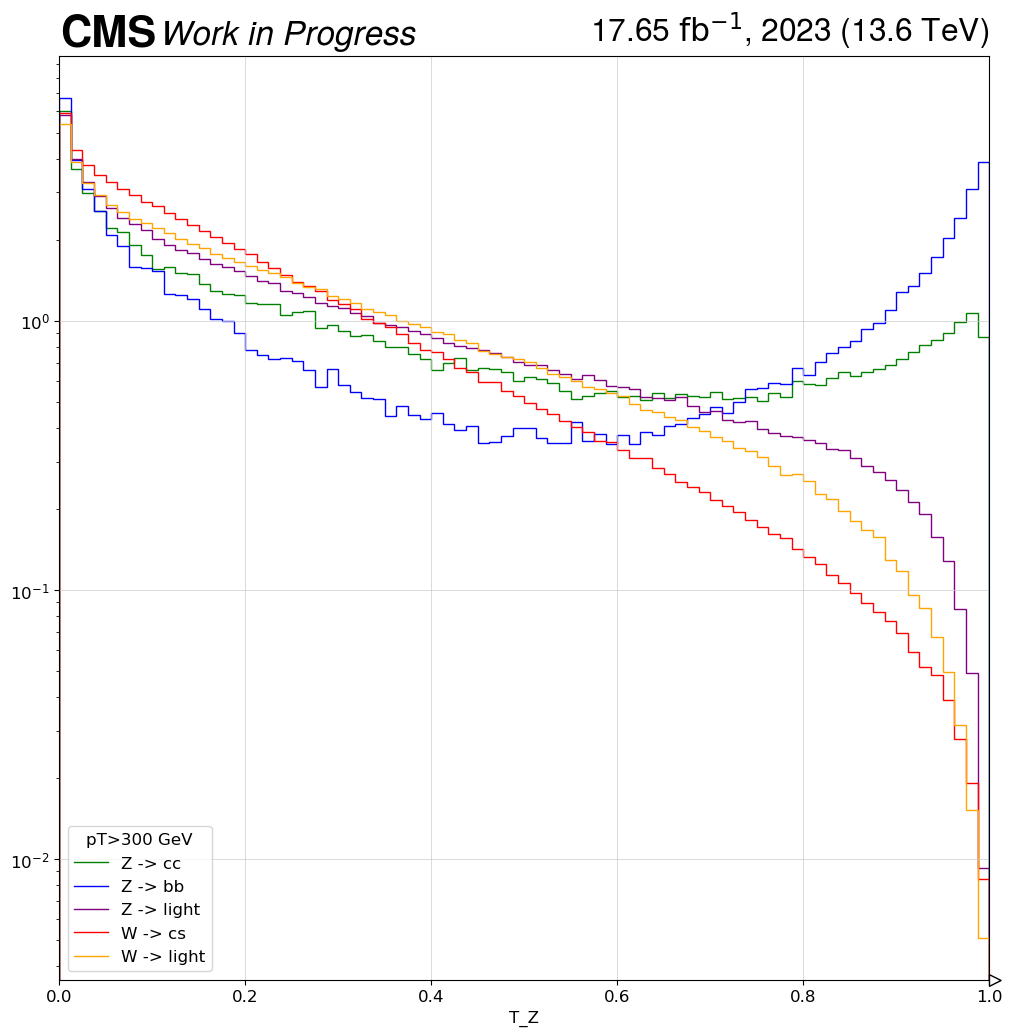

In [29]:
# T_Z right
from hist.intervals import ratio_uncertainty

h_z_bb = T_Z_bb[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_z_cc = T_Z_cc[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_cs = T_Z_cs[{"process":"Wto2Q", "order":"NLO", "name": sum}]
h_z_rest = T_Z_rest[{"process":"Zto2Q", "order":"NLO", "name": sum}]
h_w_rest = T_Z_rest[{"process":"Wto2Q", "order":"NLO", "name": sum}]
#h_data = hists["data"]
h = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest]
legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light"]
#labels = ["z", "w"]
colors = ['blue', 'green', 'red', 'purple', 'orange']

fig, ax = plt.subplots(
            1,
            1,
            figsize=(12, 12),
        )
# 1st panel
#ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=True) ##h_qcd, h_diboson, h_tt

#hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt

# plot Data
#h_data = h_xbb[{"process":sum, "order":"NLO", "name":sum}]
#hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "sum of all xjj", density=True)
ax.legend()
ax.set_yscale("log")
#ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
ax.legend(title=f"pT>300 GeV")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="major")
ax.set_xlim(0, 1)
ax.set_xlabel("T_Z")

hep.cms.label(
            "Work in Progress",
            fontsize=24,
            data=True,
            lumi="17.65",
            year="2023",
            ax=ax,
            com="13.6",
        )

# 2nd panel
plt.show()
